In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from nltk.corpus import stopwords

ModuleNotFoundError: No module named 'plotly'

In [3]:
usaccidents = pd.read_csv("US_Accidents.csv")
usaccidents.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [4]:
usaccidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [5]:
usaccidents.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [6]:
total_missing = usaccidents.isna().sum().sort_values()
total_missing

ID                             0
Crossing                       0
Give_Way                       0
Junction                       0
No_Exit                        0
Railway                        0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Traffic_Signal                 0
Country                        0
Turning_Loop                   0
State                          0
County                         0
Side                           0
Street                         0
Description                    0
Distance(mi)                   0
End_Lng                        0
End_Lat                        0
Start_Lng                      0
Start_Lat                      0
End_Time                       0
Start_Time                     0
Severity                       0
Bump                           0
Amenity                        0
Sunrise_Sunset                83
Civil_Twilight                83
Astronomic

<AxesSubplot:>

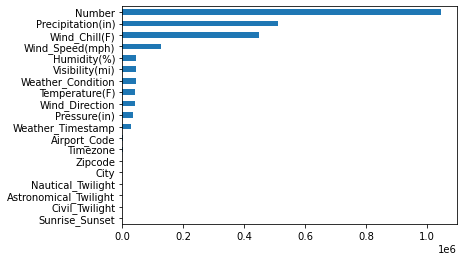

In [7]:
total_missing[total_missing != 0].plot(kind='barh')

In [8]:
states = usaccidents["State"].unique()
print("Total number of states= ",len(states))
states

Total number of states=  49


array(['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX', 'MO',
       'CO', 'OK', 'LA', 'KS', 'WI', 'IA', 'MS', 'NE', 'ND', 'WY', 'SD',
       'MT', 'NM', 'AR', 'IL', 'NJ', 'GA', 'FL', 'NY', 'CT', 'RI', 'SC',
       'NC', 'MD', 'MA', 'TN', 'VA', 'DE', 'DC', 'ME', 'AL', 'NH', 'VT',
       'AZ', 'UT', 'ID', 'OR', 'WA'], dtype=object)

In [9]:
total_state_accidents = usaccidents.State.value_counts()
print("Top 5 states with highest accidents")
total_state_accidents[:5]

Top 5 states with highest accidents


CA    448833
FL    153007
OR     87484
TX     75142
NY     60974
Name: State, dtype: int64

<AxesSubplot:title={'center':'No. of Accidents by State'}, xlabel='State', ylabel='count'>

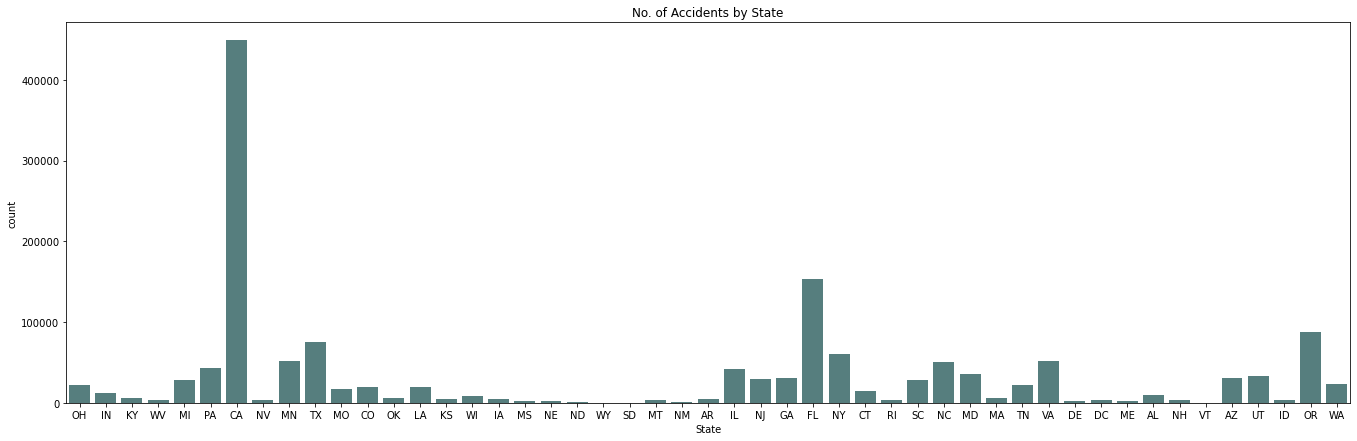

In [10]:
fig, ax = plt.subplots(figsize = (23,7))
state_plot = sns.countplot(x=usaccidents.State, data=usaccidents,color="#508484")
state_plot.set_title("No. of Accidents by State")
state_plot

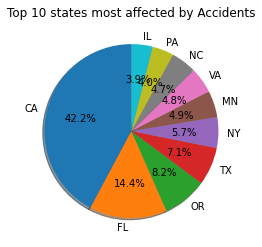

In [11]:
plt.pie(total_state_accidents[:10].values, labels = total_state_accidents[:10].index,startangle=90, shadow = True,autopct = '%1.1f%%')
plt.title("Top 10 states most affected by Accidents")
plt.show()

In [12]:
city = usaccidents["City"].unique()
print("Total number of states= ",len(city))
city

Total number of states=  10658


array(['Dublin', 'Dayton', 'Cincinnati', ..., 'Succasunna', 'Valleyford',
       'American Fork-Pleasant Grove'], dtype=object)

In [13]:
total_city_accidents = usaccidents["City"].value_counts()
print("Top 5 cities with highest accidents")
total_city_accidents[:5]

Top 5 cities with highest accidents


Los Angeles    39984
Miami          36233
Charlotte      22203
Houston        20843
Dallas         19497
Name: City, dtype: int64

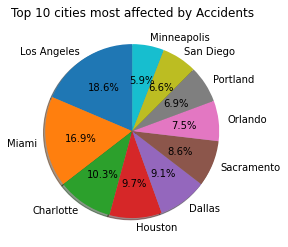

In [14]:
plt.pie(total_city_accidents[:10].values, labels = total_city_accidents[:10].index,startangle=90, shadow = True,autopct = '%1.1f%%')
plt.title("Top 10 cities most affected by Accidents")
plt.show()

<AxesSubplot:title={'center':'No. of Accidents by City - Top 50 cities'}, xlabel='City', ylabel='count'>

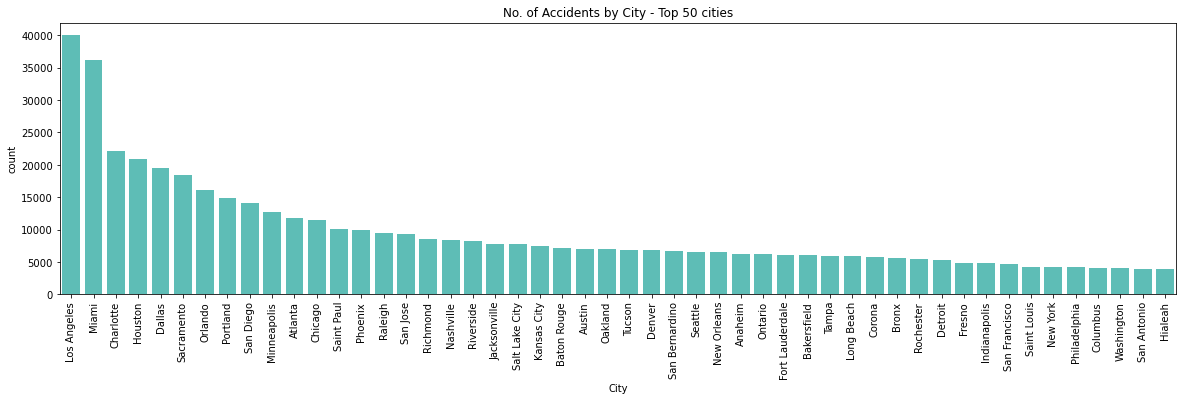

In [15]:
fig, ax = plt.subplots(figsize = (20,5))
city_plot = sns.countplot(x=usaccidents.City, data=usaccidents, order=usaccidents.City.value_counts().iloc[:50].index, orient = 'v', color = "#4ECDC4")
city_plot.set_title("No. of Accidents by City - Top 50 cities")
city_plot.set_xticklabels(city_plot.get_xticklabels(), rotation=90)
city_plot

In [16]:
state_counts = usaccidents["State"].value_counts()
fig = go.Figure(data=go.Choropleth(locations=state_counts.index, z=state_counts.values.astype(float), locationmode="USA-states"))
fig.update_layout(title_text="Number of US Accidents for each State", geo_scope="usa")
fig.show()


NameError: name 'go' is not defined

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


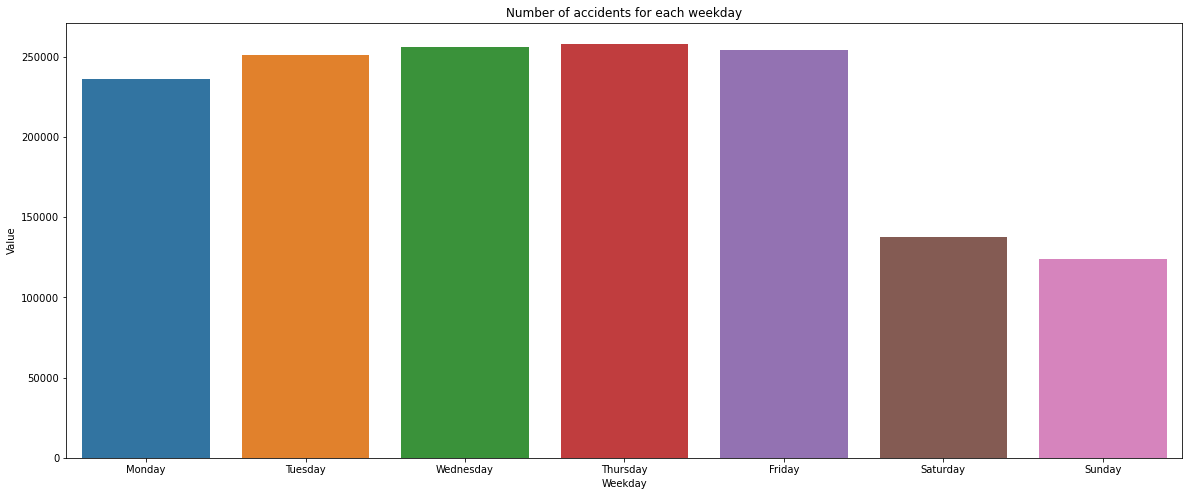

In [17]:
counts = pd.to_datetime(usaccidents['Start_Time']).dt.day_name().value_counts()
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(20, 8))
plt.title("Number of accidents for each weekday")
sns.barplot(counts.index, counts.values, order=weekdays)
plt.xlabel("Weekday")
plt.ylabel("Value")
plt.show()

In [18]:
usaccidents.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:15:39
4          2016-02-08 06:51:45
                  ...         
1516059    2019-08-23 18:03:25
1516060    2019-08-23 19:11:30
1516061    2019-08-23 19:00:21
1516062    2019-08-23 19:00:21
1516063    2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: object

In [19]:
usaccidents.Start_Time = pd.to_datetime(usaccidents.Start_Time)
usaccidents.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

<AxesSubplot:title={'center':'No. of Accidents by Hour'}, xlabel='Start_Time', ylabel='count'>

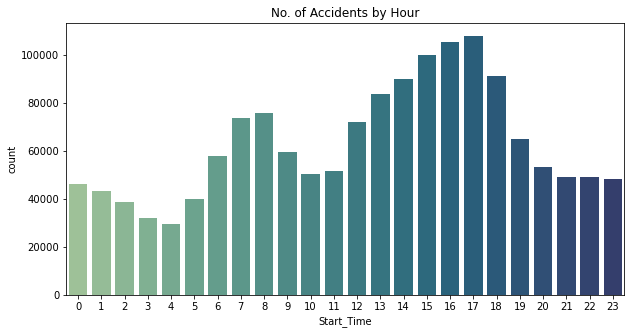

In [20]:
fig, ax = plt.subplots(figsize = (10,5))
hour_plot = sns.countplot(x=usaccidents.Start_Time.dt.hour, data=usaccidents, orient = 'v', palette = "crest")
hour_plot.set_title("No. of Accidents by Hour")
hour_plot

<AxesSubplot:title={'center':'No. of Accidents by day of the week'}, xlabel='Start_Time', ylabel='count'>

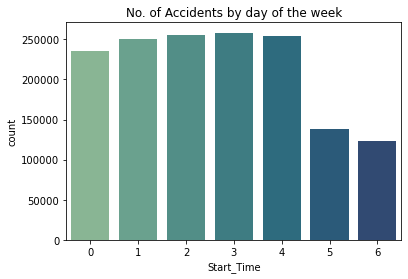

In [21]:
dayofweek_plot = sns.countplot(x=usaccidents.Start_Time.dt.dayofweek, data=usaccidents, orient = 'v', palette = "crest")
dayofweek_plot.set_title("No. of Accidents by day of the week")
dayofweek_plot

<AxesSubplot:title={'center':'No. of Accidents per hour on Sundays'}, xlabel='Start_Time', ylabel='count'>

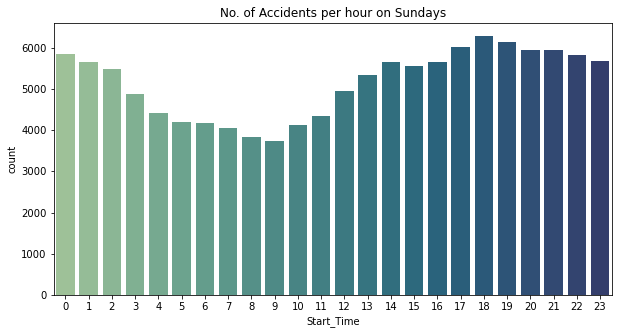

In [16]:
fig, ax = plt.subplots(figsize = (10,5))
sundays_star_time= usaccidents.Start_Time[usaccidents.Start_Time.dt.dayofweek == 6]
dayofweek_plot = sns.countplot(x=sundays_star_time.dt.hour, data=usaccidents, orient = 'v', palette = "crest")
dayofweek_plot.set_title("No. of Accidents per hour on Sundays")
dayofweek_plot

<AxesSubplot:title={'center':'No. of Accidents per hour on Thursdays'}, xlabel='Start_Time', ylabel='count'>

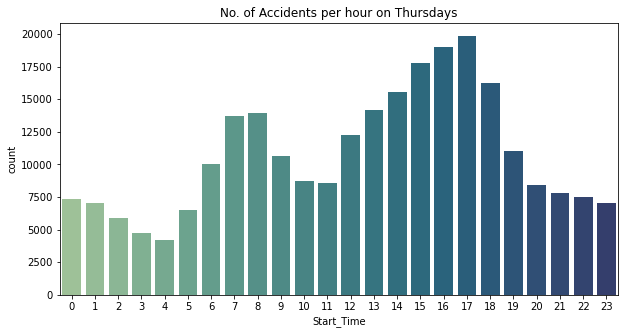

In [17]:
fig, ax = plt.subplots(figsize = (10,5))
sundays_star_time= usaccidents.Start_Time[usaccidents.Start_Time.dt.dayofweek == 3]
dayofweek_plot = sns.countplot(x=sundays_star_time.dt.hour, data=usaccidents, orient = 'v', palette = "crest")
dayofweek_plot.set_title("No. of Accidents per hour on Thursdays")
dayofweek_plot

<AxesSubplot:title={'center':'No. of Accidents by Month'}, xlabel='Start_Time', ylabel='count'>

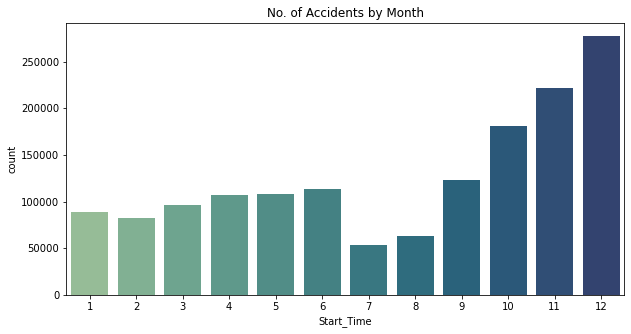

In [19]:
fig, ax = plt.subplots(figsize = (10,5))
month_plot = sns.countplot(x=usaccidents.Start_Time.dt.month, data=usaccidents, orient = 'v', palette = "crest")
month_plot.set_title("No. of Accidents by Month")
month_plot

<AxesSubplot:title={'center':'No. of Accidents by Year'}, xlabel='Start_Time', ylabel='count'>

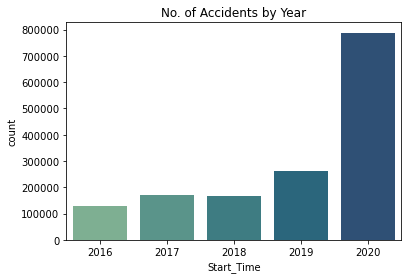

In [21]:
# Number of accidents by year
year_plot = sns.countplot(x=usaccidents.Start_Time.dt.year, data=usaccidents, orient = 'v', palette = "crest")
year_plot.set_title("No. of Accidents by Year")
year_plot

In [37]:
print("LOCATION EDA")

LOCATION EDA


In [23]:
usaccidents.Junction

Location


0          False
1          False
2           True
3           True
4          False
           ...  
1516059    False
1516060    False
1516061     True
1516062    False
1516063    False
Name: Junction, Length: 1516064, dtype: bool

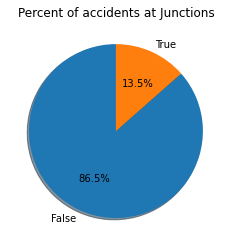

In [38]:
junction_accidents = usaccidents.Junction.value_counts()
plt.pie(junction_accidents.values, labels = junction_accidents.index,startangle=90, shadow = True,autopct = '%1.1f%%')
plt.title("Percent of accidents at Junctions")
plt.show()

In [24]:
usaccidents.Roundabout

0          False
1          False
2          False
3          False
4          False
           ...  
1516059    False
1516060    False
1516061    False
1516062    False
1516063    False
Name: Roundabout, Length: 1516064, dtype: bool

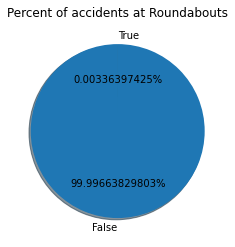

In [35]:
roundabout_accidents = usaccidents.Roundabout.value_counts()
plt.pie(roundabout_accidents.values, labels = roundabout_accidents.index,startangle=90, shadow = True,autopct = '%1.11f%%')
plt.title("Percent of accidents at Roundabouts")
plt.show()

In [25]:
usaccidents.Traffic_Signal

0          False
1          False
2          False
3          False
4          False
           ...  
1516059    False
1516060    False
1516061    False
1516062    False
1516063    False
Name: Traffic_Signal, Length: 1516064, dtype: bool

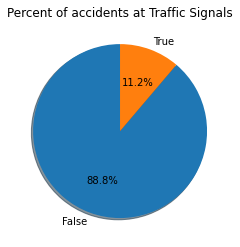

In [31]:
signal_accidents = usaccidents.Traffic_Signal.value_counts()
plt.pie(signal_accidents.values, labels = signal_accidents.index,startangle=90, shadow = True,autopct = '%1.1f%%')
plt.title("Percent of accidents at Traffic Signals")
plt.show()

In [27]:
usaccidents.Crossing

0          False
1          False
2          False
3          False
4          False
           ...  
1516059    False
1516060    False
1516061    False
1516062    False
1516063    False
Name: Crossing, Length: 1516064, dtype: bool

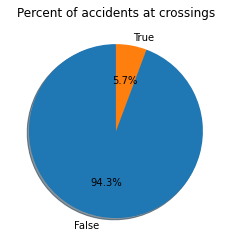

In [30]:
crossing_accidents = usaccidents.Crossing.value_counts()
plt.pie(crossing_accidents.values, labels = crossing_accidents.index,startangle=90, shadow = True,autopct = '%1.1f%%')
plt.title("Percent of accidents at crossings")
plt.show()